**COGNIFYZ TECHNOLOGIES**   
*Data Analysis Intern* 

****LEVEL 3:****  
**TASK - 3:** Price Range vs. Online Delivery and Table Booking   
**AUTHOR:** Sunita Sahu   
**AIM** : *The project aims to analyze the relationship between price range and the availability of online delivery and table booking to determine if higher-priced restaurants are more likely to offer these services.*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df=pd.read_csv('Dataset.csv',encoding='unicode_escape')

In [4]:
df.rename(columns ={'ï»¿Restaurant ID':'Restaurant ID'},inplace =True)
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.shape

(9551, 21)

In [6]:
df.dropna(inplace=True)
pd.isnull(df).sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9542 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9542 non-null   int64  
 1   Restaurant Name       9542 non-null   object 
 2   Country Code          9542 non-null   int64  
 3   City                  9542 non-null   object 
 4   Address               9542 non-null   object 
 5   Locality              9542 non-null   object 
 6   Locality Verbose      9542 non-null   object 
 7   Longitude             9542 non-null   float64
 8   Latitude              9542 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9542 non-null   int64  
 11  Currency              9542 non-null   object 
 12  Has Table booking     9542 non-null   object 
 13  Has Online delivery   9542 non-null   object 
 14  Is delivering now     9542 non-null   object 
 15  Switch to order menu  9542

In [8]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,18.179208,64.274997,25.848532,1200.326137,1.804968,2.665238,156.772060
std,8.791967e+06,56.451600,41.197602,11.010094,16128.743876,0.905563,1.516588,430.203324
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019312e+05,1.000000,77.081565,28.478658,250.000000,1.000000,2.500000,5.000000
50%,6.002726e+06,1.000000,77.192031,28.570444,400.000000,2.000000,3.200000,31.000000
75%,1.835260e+07,1.000000,77.282043,28.642711,700.000000,2.000000,3.700000,130.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


CHECK IF THERE IS A RELATIONSHIP BETWEEN THE PRICE RANGE & AVAILABILITY OF ONLINE DELIVERY AND TABLE BOOKING.

In [9]:
cross_tab=pd.crosstab(df['Price range'],df['Has Online delivery'])
cross_tab.head()

Has Online delivery,No,Yes
Price range,,
1,3737,701
2,1827,1286
3,994,411
4,533,53


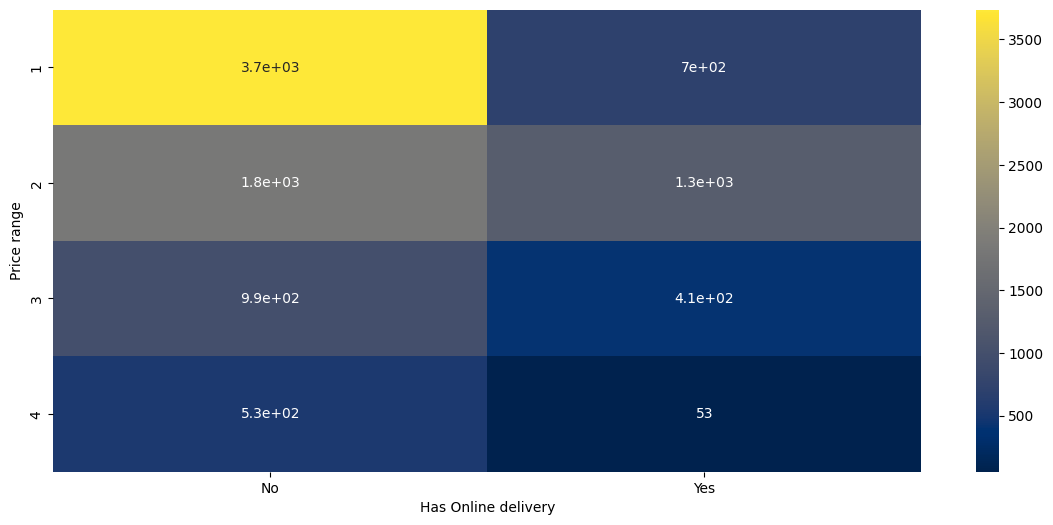

In [10]:
plt.figure(figsize=(14,6))
sns.heatmap(cross_tab,annot=True,cmap='cividis')
plt.show()

In [11]:
df['Has Table booking'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
df['Has Table booking'].unique()
df.groupby('Has Online delivery')['Price range'].mean()

Has Online delivery
No     1.763503
Yes    1.924929
Name: Price range, dtype: float64

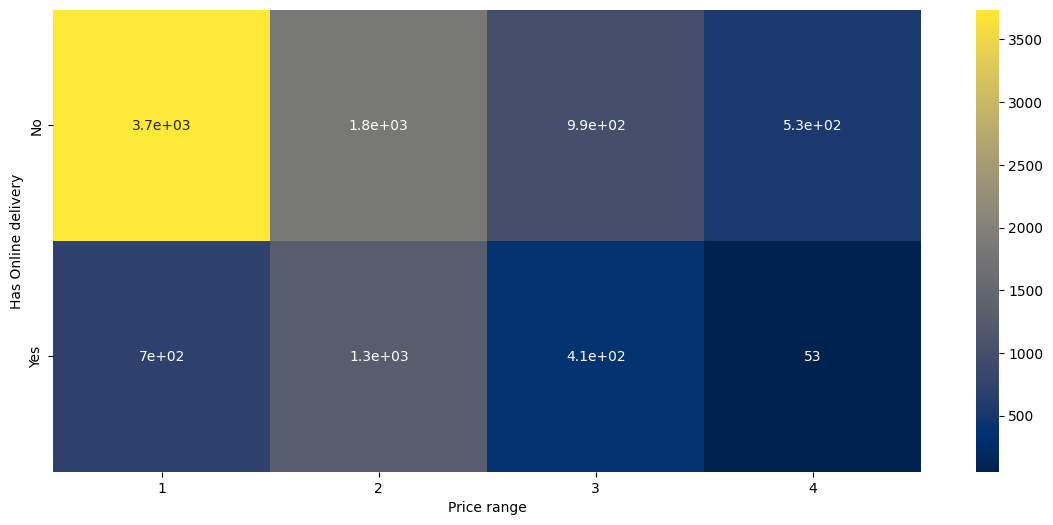

In [21]:
crosstab=pd.crosstab(df['Has Online delivery'],df['Price range'])
plt.figure(figsize=(14,6))
sns.heatmap(crosstab,annot=True,cmap='cividis')
plt.show()

In [14]:
df.groupby('Has Table booking')['Price range'].mean()

Has Table booking
No     1.635973
Yes    3.028497
Name: Price range, dtype: float64

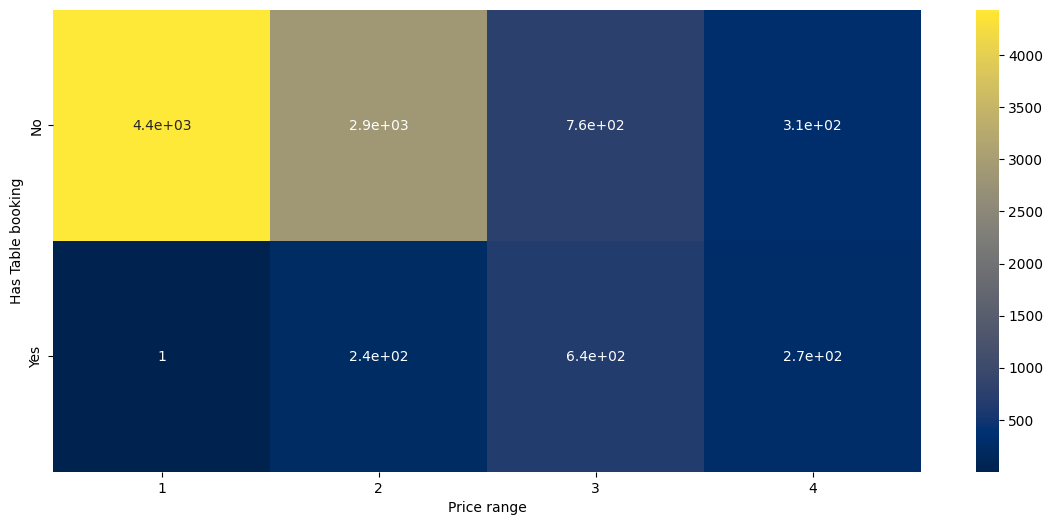

In [22]:
crosstab=pd.crosstab(df['Has Table booking'],df['Price range'])
plt.figure(figsize=(14,6))
sns.heatmap(crosstab,annot=True,cmap='cividis')
plt.show()

DETERMINE IF HIGHER- PRICED RESTAURANTS ARE MORE LIKELY TO OFFER THESE SERVICES.


In [16]:
df['Price range'].max()

4

In [17]:
df['Has Online delivery'].value_counts()

Has Online delivery
No     7091
Yes    2451
Name: count, dtype: int64

C:\Users\sunit\AppData\Local\Temp\ipykernel_27920\3981017333.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price range', data=df, palette=custom_palette)


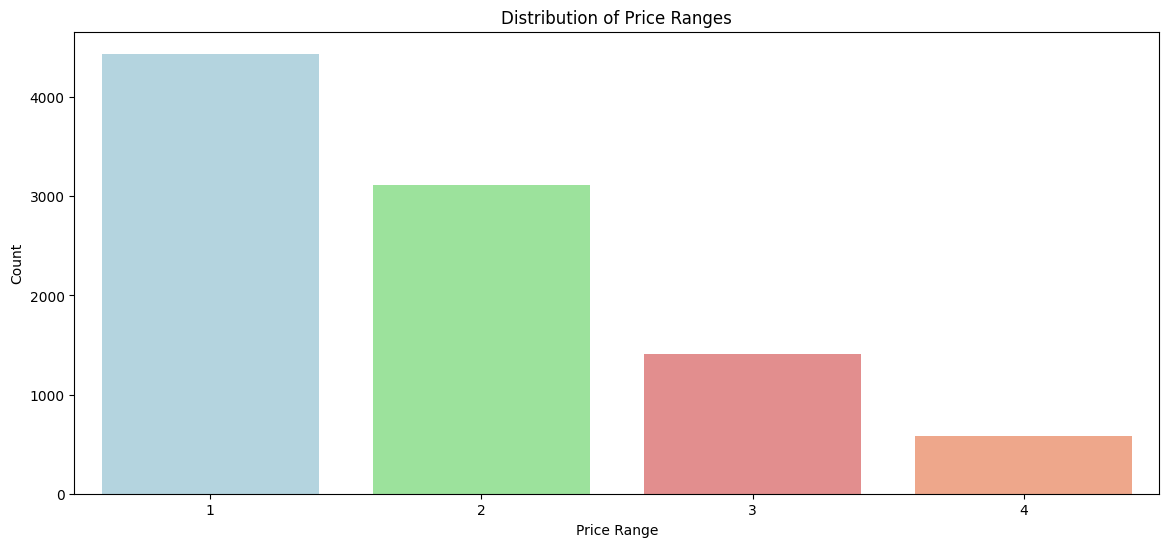

In [23]:
# Set the figure size
plt.figure(figsize=(14,6))

# Define a custom color palette with updated colors
custom_palette = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Create a countplot of price ranges using the custom palette
sns.countplot(x='Price range', data=df, palette=custom_palette)

# Add title and axis labels
plt.title('Distribution of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')

# Display the plot
plt.show()

In [19]:
# Calculate the proportion of restaurants offering table booking
table_booking_proportion = df['Has Table booking'].value_counts(normalize=True)

# Calculate the proportion of restaurants offering online delivery
online_delivery_proportion = df['Has Online delivery'].value_counts(normalize=True)

# Print the results
print('Proportion of restaurants offering table booking:')
print(table_booking_proportion)
print('\nProportion of restaurants offering online delivery:')
print(online_delivery_proportion)

Proportion of restaurants offering table booking:
Has Table booking
No     0.878642
Yes    0.121358
Name: proportion, dtype: float64

Proportion of restaurants offering online delivery:
Has Online delivery
No     0.743136
Yes    0.256864
Name: proportion, dtype: float64


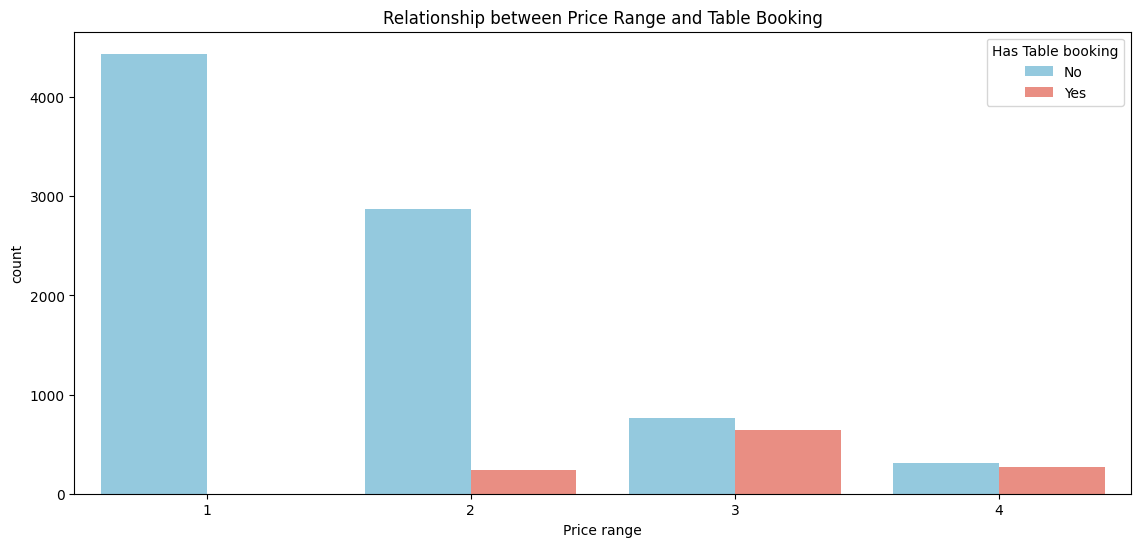

In [35]:
# Set the figure size (larger dimensions)
plt.figure(figsize=(30, 6))

# Create subplot 1 (left plot)
plt.subplot(1, 2, 1)

# Define a custom color palette
custom_palette = ['skyblue', 'salmon']

# Assuming 'df' is your DataFrame containing the data
# Create a countplot to show the relationship between Price range and Table booking
sns.countplot(x='Price range', hue='Has Table booking', data=df, palette=custom_palette)

# Add title and adjust subplot
plt.title('Relationship between Price Range and Table Booking')

# Display the plot
plt.show()